In [1]:
%pip install -q numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import math
import collections
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

In [17]:
# Define column names - 57 features + 1 label column
feature_names = [
    # Word frequency features (48)
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    
    # Character frequency features (6)
    'char_freq_semicolon', 'char_freq_leftParen','char_freq_leftBracket'
, 'char_freq_exclamation','char_freq_dollar', 'char_freq_hash',
    
    # Capital run features (3)
    'capital_run_length_avg', 'capital_run_length_longest', 'capital_run_length_total',
    
    # Target class (1 = spam, 0 = non-spam)
    'is_spam'
]

# Load the dataset
data_path = '..\data\spambase.data'
df = pd.read_csv(data_path, header=None, names=feature_names)

# Display the first few rows
print(f"Dataset shape: {df.shape}")
df.head()

<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
C:\Users\SNEHA\AppData\Local\Temp\ipykernel_19884\680051546.py:27: SyntaxWarning: invalid escape sequence '\d'
  data_path = '..\data\spambase.data'


Dataset shape: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftParen,char_freq_leftBracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_avg,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [21]:
df.to_csv('../data/spambase.csv', index=False)

In [22]:
df=pd.read_csv('../data/spambase.csv')

In [23]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftParen,char_freq_leftBracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_avg,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Class distribution:
is_spam
0    2788
1    1813
Name: count, dtype: int64


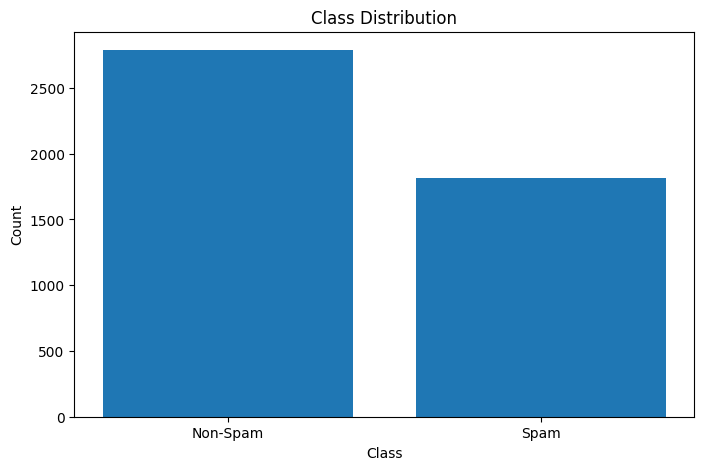

In [15]:
# Check class distribution
class_counts = df['is_spam'].value_counts()
print(f"Class distribution:\n{class_counts}")

# Visualize
plt.figure(figsize=(8, 5))
plt.bar(['Non-Spam', 'Spam'], class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [16]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftParen,char_freq_rightParen,char_freq_leftBracket,char_freq_rightBracket,char_freq_exclamation,capital_run_length_avg,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [24]:
def mean(fv):
    '''Calculate the mean of a feature vector.'''
    return float(sum(fv)) / len(fv)

## Bernoulli Naive Bayes

In [25]:
def bernoulli_random_variable(th):
    '''Return a Bernoulli random variable for the threshold.'''
    return lambda x: th < x

def bernoulli_distribution(fv, rv):
    '''Return a Bernoulli PMF for the feature vector and random variable.'''
    successCt = sum([rv(f) for f in fv])
    prSuccess = float(successCt + 1) / (len(fv) + 2)  # Laplace smoothing
    prFailure = float(len(fv) - successCt + 1) / (len(fv) + 2)  # Laplace smoothing
    return lambda x: prSuccess if rv(x) else prFailure

def bernoulli_model(fv, th=None):
    '''Produce a Bernoulli PMF for the feature vector.
    If the threshold is not specified, use the mean of the feature values.
    '''
    rv = bernoulli_random_variable(mean(fv) if th is None else th)
    return bernoulli_distribution(fv, rv)

In [26]:
def mvue(fv, mu=None):
    '''Minimum variance unbiased estimation of a feature vector.'''
    mu = mean(fv) if mu is None else float(mu)
    return sum([math.pow(v - mu, 2) for v in fv]) / (len(fv) - 1) if len(fv) > 1 else 0

def gaussian_density(mu, var):
    '''Return a Gaussian PDF with the given mean and variance'''
    if var == 0.0:
        # Handle zero variance case
        return lambda x: 1.0
    
    # Constants in the pdf
    sd = math.sqrt(var)
    a = 1 / (sd * math.sqrt(2 * math.pi))
    
    # PDF function
    def pdf(x):
        b = -1 * math.pow(x - mu, 2) / (2 * var)
        return a * math.exp(b)
    
    return pdf

def gaussian_model(fv):
    '''Produce a Gaussian PDF for the feature vector.'''
    mu = mean(fv)
    var = mvue(fv)
    return gaussian_density(mu, var)

In [28]:
def histogram_random_variable(dividers):
    '''Return a histogram random variable which chooses buckets for data.'''
    dividers.sort()
    def fn(x):
        for i, d in enumerate(dividers):
            if x <= d:
                return i
        return len(dividers)
    return fn

def histogram_distribution(fv, rv, numclasses):
    '''Return a histogram PMF for the feature vector and random variable.'''
    seen = collections.defaultdict(lambda: 0)
    for f in fv:
        seen[rv(f)] += 1
    return lambda x: (seen[rv(x)] + 1.0) / (len(fv) + numclasses)  # Laplace Smoothing

def histogram_model(fv, dividers=None):
    '''Produce a histogram PMF for the feature vector.
    If dividers is None, will make four buckets using the upper, lower, and
    overall means of the feature values.
    '''
    if dividers is None:
        m = mean(fv)
        lo = [v for v in fv if v <= m]
        hi = [v for v in fv if m < v]
        dividers = [mean(lo) if lo else m, m, mean(hi) if hi else m]
    return histogram_distribution(fv, histogram_random_variable(dividers), len(dividers) + 1)

In [29]:
def naivebayes(testing, training, model_fn):
    '''
    Performs Naive Bayes classification
    
    Args:
        testing: List of test data points
        training: List of training data points
        model_fn: Function to create model (bernoulli_model, gaussian_model, histogram_model)
        
    Returns:
        List of testing data points with log odds scores
    '''
    # Split training data by label
    T = []  # Spam emails (label=1)
    F = []  # Non-spam emails (label=0)
    
    for dp in training:
        (T if dp['label'] else F).append(dp['features'])
    
    # Calculate prior probabilities and log-odds
    Tprior = float(len(T)) / len(training)
    Fprior = float(len(F)) / len(training)
    priorlogodds = math.log(Tprior / Fprior)
    
    # Generate models for each feature
    Tm = []  # Models for spam class
    Fm = []  # Models for non-spam class
    
    # zip(*seq) rotates data points to feature vectors
    for Tfv, Ffv in zip(zip(*T), zip(*F)):
        try:
            tm = model_fn(Tfv)
            fm = model_fn(Ffv)
        except Exception:  # Handle zero variance cases
            # Ignore this feature with math.log(tm=1.0 / tm=1.0) == 0.0
            tm = fm = lambda x: 1.0
        
        Tm.append(tm)
        Fm.append(fm)
    
    # Copy testing data and calculate log-odds for each test point
    ret = [dp.copy() for dp in testing]
    
    # Accumulate log-odds over the features of each data point
    zct = len(T[0]) * [0]  # A zero counter for each feature
    
    for dp in ret:
        dp['logodds'] = priorlogodds
        for idx, val in enumerate(dp['features']):
            gT = Tm[idx](val)
            gF = Fm[idx](val)
            if gT != 0.0 and gF != 0.0:
                dp['logodds'] += math.log(gT / gF)
            else:
                zct[idx] += 1
        del dp['features']  # We don't need features anymore
    
    # Notify about any ignored features
    if any(zct):
        ignored_features = [f'#{i}, {ct}x' for i, ct in enumerate(zct) if ct > 0.01 * len(testing)]
        if ignored_features:
            print(f"Ignored features: {'; '.join(ignored_features)}")
    
    return ret

In [30]:
def analyze(predicted):
    '''
    Analyze classification results
    
    Args:
        predicted: List of datapoints with predictions
        
    Returns:
        Dictionary with performance metrics
    '''
    results = {'tp': 0.0, 'fn': 0.0, 'fp': 0.0, 'tn': 0.0}
    
    for dp in predicted:
        results['tp'] += dp['label'] == 1 and dp['prediction'] == 1
        results['fn'] += dp['label'] == 1 and dp['prediction'] == 0
        results['fp'] += dp['label'] == 0 and dp['prediction'] == 1
        results['tn'] += dp['label'] == 0 and dp['prediction'] == 0

    # Prevent division by zero
    pos_count = results['tp'] + results['fn']
    neg_count = results['fp'] + results['tn']
    
    # False positive rate (false alarms)
    results['fpr'] = results['fp'] / neg_count if neg_count > 0 else 0.0

    # False negative rate (missed spams)
    results['fnr'] = results['fn'] / pos_count if pos_count > 0 else 0.0

    # True positive rate (detections)
    results['tpr'] = results['tp'] / pos_count if pos_count > 0 else 0.0
    
    # True negative rate (correct rejections)
    results['tnr'] = results['tn'] / neg_count if neg_count > 0 else 0.0

    # Overall error rate (mistakes)
    results['oer'] = (results['fp'] + results['fn']) / len(predicted) if predicted else 0.0
    
    # Accuracy
    results['accuracy'] = (results['tp'] + results['tn']) / len(predicted) if predicted else 0.0
    
    # Precision
    results['precision'] = results['tp'] / (results['tp'] + results['fp']) if (results['tp'] + results['fp']) > 0 else 0.0
    
    # Recall (same as TPR)
    results['recall'] = results['tpr']
    
    # F1 Score
    if results['precision'] + results['recall'] > 0:
        results['f1'] = 2 * (results['precision'] * results['recall']) / (results['precision'] + results['recall'])
    else:
        results['f1'] = 0.0
        
    return results

In [31]:
def apply_threshold(logodds, threshold):
    '''Convert log-odds to binary prediction using a threshold.'''
    return 1 if logodds > threshold else 0

def find_best_threshold(augmented):
    '''Find the threshold that minimizes error.'''
    # Sort by log odds
    sorted_data = sorted(augmented, key=lambda x: x['logodds'])
    
    best_error = float('inf')
    best_threshold = 0
    
    # Try thresholds between each pair of consecutive log-odds values
    for i in range(len(sorted_data) - 1):
        threshold = (sorted_data[i]['logodds'] + sorted_data[i + 1]['logodds']) / 2
        
        # Apply threshold and calculate error
        for dp in augmented:
            dp['prediction'] = apply_threshold(dp['logodds'], threshold)
            
        results = analyze(augmented)
        error = results['oer']
        
        # Update best threshold if this one is better
        if error < best_error:
            best_error = error
            best_threshold = threshold
            
    return best_threshold

In [32]:
def prepare_data(df):
    """Convert pandas dataframe to list of dictionaries with features and labels."""
    data = []
    for _, row in df.iterrows():
        features = row.values[:-1].tolist()  # All columns except the last one
        label = int(row.values[-1])  # Last column is the label
        data.append({'features': features, 'label': label})
    return data

def k_fold_cross_validation(data, k=10, model_fn=gaussian_model):
    """Perform k-fold cross-validation."""
    # Shuffle the data
    np.random.shuffle(data)
    
    # Split into k folds
    fold_size = len(data) // k
    folds = [data[i*fold_size:(i+1)*fold_size] for i in range(k)]
    
    # Ensure all data points are used
    # Add remaining data points to the last fold
    if len(data) % k != 0:
        remainder = len(data) % k
        folds[-1].extend(data[-remainder:])
    
    results = []
    
    for i in range(k):
        # Use fold i as test set and the rest as training set
        test_fold = folds[i]
        train_folds = [fold for j, fold in enumerate(folds) if j != i]
        training = [item for fold in train_folds for item in fold]  # Flatten
        
        # Train and evaluate
        augmented = naivebayes(test_fold, training, model_fn)
        
        # Find best threshold
        threshold = find_best_threshold(augmented)
        
        # Apply threshold and get predictions
        for dp in augmented:
            dp['prediction'] = apply_threshold(dp['logodds'], threshold)
        
        # Analyze results
        fold_results = analyze(augmented)
        fold_results['threshold'] = threshold
        fold_results['fold'] = i
        
        results.append(fold_results)
        
    return results

In [33]:
# Prepare data
data = prepare_data(df)

# Dictionary to store all results
all_results = {}

# Run k-fold cross-validation for each model
for name, model_fn in [('Bernoulli', bernoulli_model), 
                        ('Gaussian', gaussian_model), 
                        ('Histogram', histogram_model)]:
    print(f"\nRunning 10-fold cross-validation for {name} Naive Bayes...")
    results = k_fold_cross_validation(data, k=10, model_fn=model_fn)
    all_results[name] = results
    
    # Print average results
    avg_results = {
        'accuracy': np.mean([r['accuracy'] for r in results]),
        'precision': np.mean([r['precision'] for r in results]),
        'recall': np.mean([r['recall'] for r in results]),
        'f1': np.mean([r['f1'] for r in results]),
        'fpr': np.mean([r['fpr'] for r in results]),
        'fnr': np.mean([r['fnr'] for r in results]),
        'oer': np.mean([r['oer'] for r in results])
    }
    
    print(f"\nAverage results for {name} Naive Bayes:")
    print(f"Accuracy: {avg_results['accuracy']:.4f}")
    print(f"Precision: {avg_results['precision']:.4f}")
    print(f"Recall: {avg_results['recall']:.4f}")
    print(f"F1 Score: {avg_results['f1']:.4f}")
    print(f"False Positive Rate: {avg_results['fpr']:.4f}")
    print(f"False Negative Rate: {avg_results['fnr']:.4f}")
    print(f"Overall Error Rate: {avg_results['oer']:.4f}")


Running 10-fold cross-validation for Bernoulli Naive Bayes...

Average results for Bernoulli Naive Bayes:
Accuracy: 0.9037
Precision: 0.8572
Recall: 0.9096
F1 Score: 0.8815
False Positive Rate: 0.1008
False Negative Rate: 0.0904
Overall Error Rate: 0.0963

Running 10-fold cross-validation for Gaussian Naive Bayes...
Ignored features: #25, 8x; #26, 30x; #28, 26x; #31, 8x; #40, 21x; #41, 13x; #45, 6x; #47, 6x
Ignored features: #24, 10x; #25, 6x; #26, 40x; #28, 24x; #30, 13x; #31, 9x; #41, 18x; #43, 8x
Ignored features: #25, 6x; #26, 37x; #28, 19x; #30, 5x; #31, 11x; #33, 10x; #40, 17x; #41, 20x; #45, 5x
Ignored features: #1, 5x; #24, 11x; #25, 9x; #26, 34x; #28, 23x; #30, 7x; #31, 8x; #34, 6x; #40, 11x; #41, 14x; #43, 5x; #45, 5x
Ignored features: #24, 6x; #26, 43x; #28, 18x; #31, 9x; #40, 12x; #41, 15x
Ignored features: #1, 5x; #24, 7x; #25, 7x; #26, 35x; #28, 30x; #30, 6x; #31, 17x; #40, 18x; #41, 21x; #43, 5x; #45, 5x
Ignored features: #24, 12x; #25, 7x; #26, 61x; #28, 21x; #31, 12x;

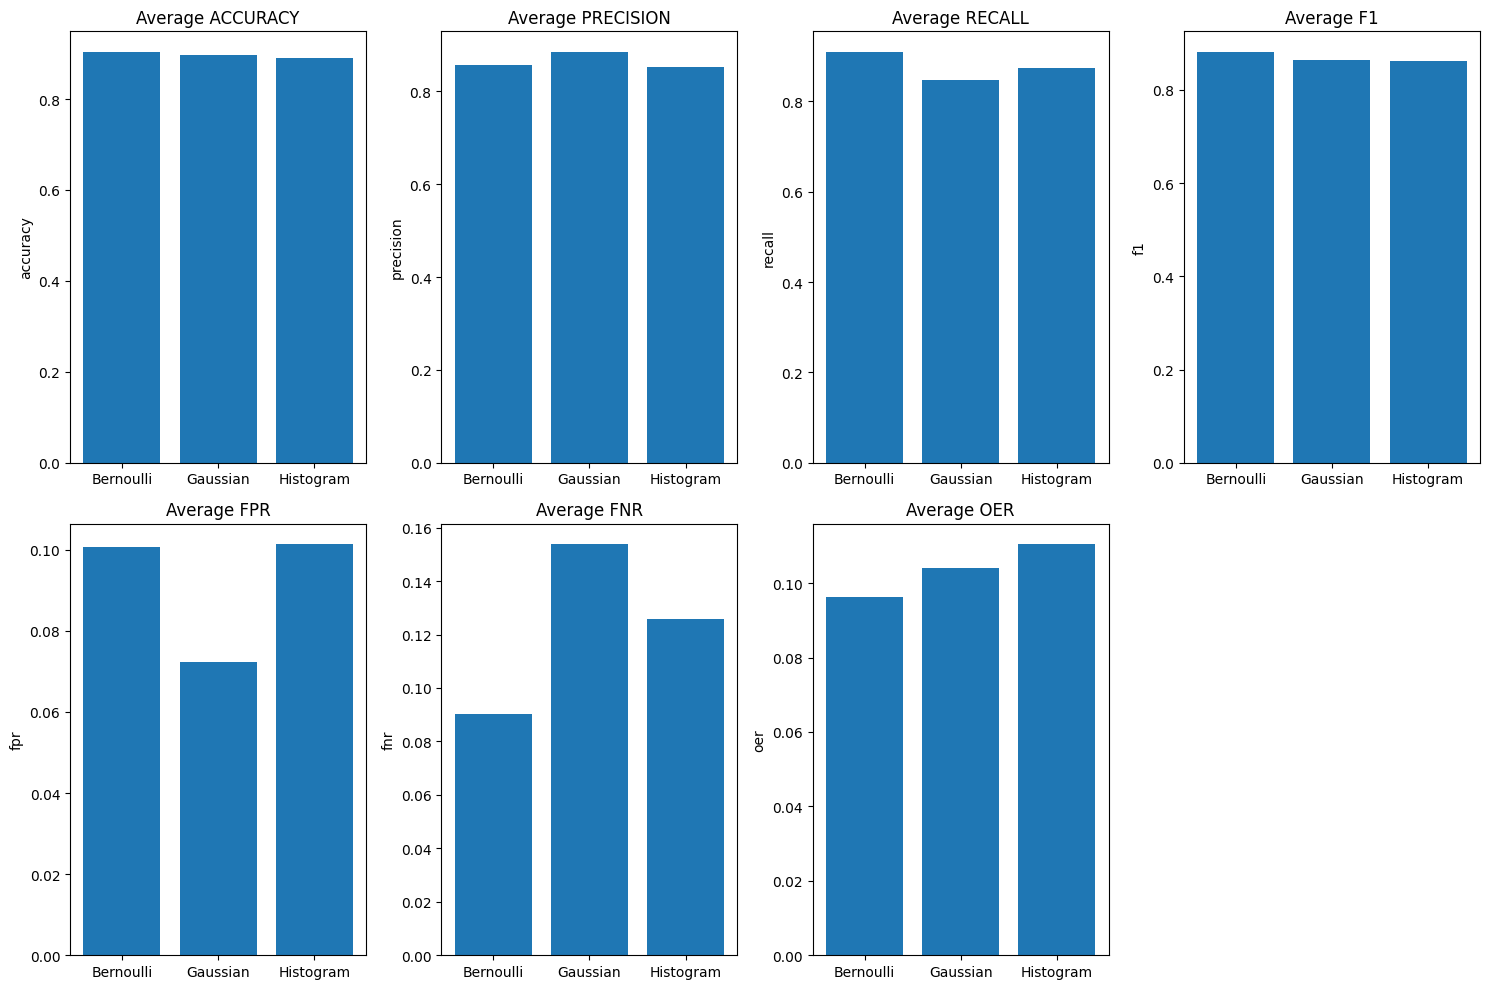

In [34]:
# Compare models with bar charts
metrics = ['accuracy', 'precision', 'recall', 'f1', 'fpr', 'fnr', 'oer']
models = list(all_results.keys())

# Calculate average metrics for each model
avg_metrics = {}
for model in models:
    avg_metrics[model] = {}
    for metric in metrics:
        avg_metrics[model][metric] = np.mean([r[metric] for r in all_results[model]])

# Create bar charts
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 4, i)
    values = [avg_metrics[model][metric] for model in models]
    plt.bar(models, values)
    plt.title(f'Average {metric.upper()}')
    plt.ylabel(metric)
    
plt.tight_layout()
plt.show()

In [35]:
def roc_data(augmented):
    '''Generate data for ROC curve'''
    # Sort by log-odds
    sorted_data = sorted(augmented, key=lambda x: x['logodds'])
    
    # Start with all predictions as negative
    all_negative = [{'label': dp['label'], 'logodds': dp['logodds'], 'prediction': 0} 
                   for dp in sorted_data]
    
    # Initialize with results for all negative predictions
    init_results = analyze(all_negative)
    points = [(init_results['fpr'], init_results['tpr'])]
    
    # Incrementally change predictions from negative to positive
    for i, dp in enumerate(sorted_data):
        # Set all data points with log odds >= current point to positive
        threshold = dp['logodds']
        for j in range(i, len(sorted_data)):
            all_negative[j]['prediction'] = 1
            
        # Analyze and record FPR, TPR
        results = analyze(all_negative)
        points.append((results['fpr'], results['tpr']))
        
    return points

Ignored features: #24, 10x; #25, 6x; #26, 68x; #28, 35x; #30, 16x; #31, 9x; #34, 6x; #40, 15x; #41, 16x; #43, 5x


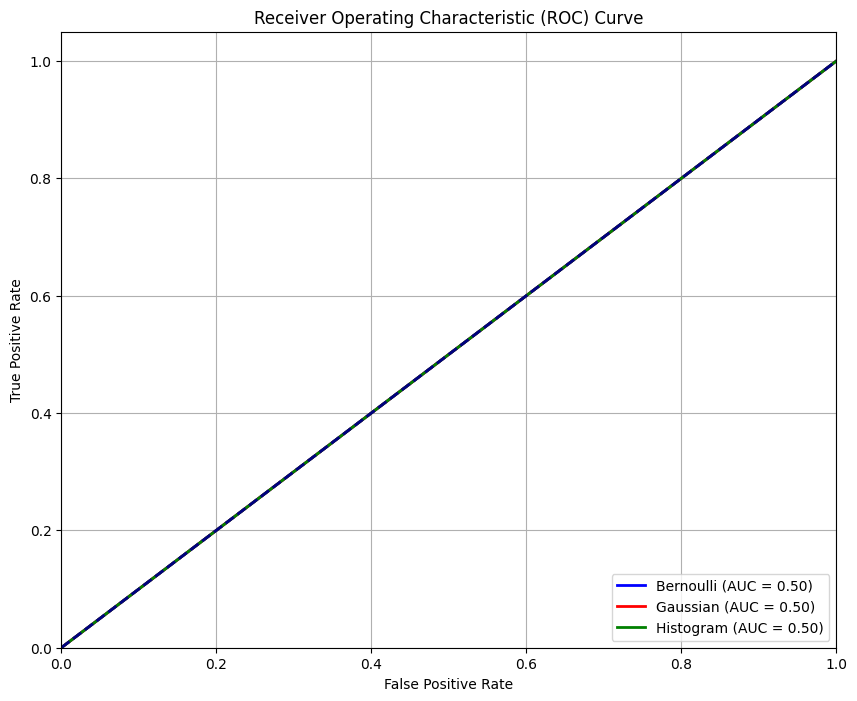

In [36]:
# Generate ROC curves
plt.figure(figsize=(10, 8))

# Color map for models
colors = {'Bernoulli': 'blue', 'Gaussian': 'red', 'Histogram': 'green'}

# For each model, generate ROC data for the first fold
for name, results in all_results.items():
    # Use first fold for simplicity
    fold_data = [dp for dp in data if dp['label'] in [0, 1]]  # Filter valid labels
    fold_idx = 0
    
    # Split into train/test
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    train_idx, test_idx = next(kf.split(fold_data))
    
    train_data = [fold_data[i] for i in train_idx]
    test_data = [fold_data[i] for i in test_idx]
    
    # Get model function
    if name == 'Bernoulli':
        model_fn = bernoulli_model
    elif name == 'Gaussian':
        model_fn = gaussian_model
    else:
        model_fn = histogram_model
    
    # Run Naive Bayes
    augmented = naivebayes(test_data, train_data, model_fn)
    
    # Get ROC data
    roc_points = roc_data(augmented)
    
    # Extract FPR and TPR
    fpr = [p[0] for p in roc_points]
    tpr = [p[1] for p in roc_points]
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[name], lw=2, 
             label=f'{name} (AUC = {roc_auc:.2f})')

# Finishing touches
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [37]:
# Create a model directory if it doesn't exist
import os
if not os.path.exists('../model'):
    os.makedirs('../model')

# Determine the best model based on F1 score (balances precision and recall)
best_model_name = None
best_f1_score = 0
best_accuracy = 0

print("\n=== Model Comparison Summary ===")
print(f"{'Model':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-" * 55)

for model_name in all_results:
    # Calculate average metrics across all folds
    avg_f1 = np.mean([r['f1'] for r in all_results[model_name]])
    avg_accuracy = np.mean([r['accuracy'] for r in all_results[model_name]])
    avg_precision = np.mean([r['precision'] for r in all_results[model_name]])
    avg_recall = np.mean([r['recall'] for r in all_results[model_name]])
    
    print(f"{model_name:<10} {avg_accuracy:<10.4f} {avg_precision:<10.4f} {avg_recall:<10.4f} {avg_f1:<10.4f}")
    
    # Update best model if this one has a better F1 score
    if avg_f1 > best_f1_score:
        best_f1_score = avg_f1
        best_accuracy = avg_accuracy
        best_model_name = model_name

print("\n✅ Best model based on F1 score:", best_model_name)
print(f"   Accuracy: {best_accuracy:.4f}, F1 Score: {best_f1_score:.4f}")

# Get the model function for the best model
if best_model_name == 'Bernoulli':
    best_model_fn = bernoulli_model
elif best_model_name == 'Gaussian':
    best_model_fn = gaussian_model
else:  # Histogram
    best_model_fn = histogram_model

# Train on the full dataset
print("\nTraining the best model on the full dataset...")
X = np.array([dp['features'] for dp in data])
y = np.array([dp['label'] for dp in data])

# Save the model and necessary components for inference
import pickle

model_info = {
    'model_name': best_model_name,
    'model_function': best_model_fn,
    'feature_names': feature_names[:-1],  # Exclude the target column
    'performance': {
        'accuracy': best_accuracy,
        'f1_score': best_f1_score
    },
    'training_data': {
        'X': X,
        'y': y
    }
}

# Save the model to disk
with open('../model/spam_detection_model.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print(f"\nModel saved to '../model/spam_detection_model.pkl'")

# Create a simple inference function and save it as example
def predict_spam_probability(email_features, model_info):
    """
    Predict the probability of an email being spam using the saved model.
    
    Args:
        email_features: Feature vector extracted from an email
        model_info: Loaded model information
        
    Returns:
        probability: Probability of the email being spam
    """
    # Prepare training data in the format needed by naivebayes function
    X_train = model_info['training_data']['X']
    y_train = model_info['training_data']['y']
    
    training_data = [{'features': X_train[i].tolist(), 'label': y_train[i]} 
                    for i in range(len(y_train))]
    
    # Prepare the test data (just one sample)
    test_data = [{'features': email_features, 'label': 0}]  # label doesn't matter
    
    # Apply Naive Bayes
    result = naivebayes(test_data, training_data, model_info['model_function'])
    
    # Convert log-odds to probability: P(spam) = 1 / (1 + e^(-log_odds))
    log_odds = result[0]['logodds']
    probability = 1 / (1 + math.exp(-log_odds))
    
    return probability

# Example of how to use the model
with open('../model/inference_example.py', 'w') as f:
    f.write("""
import pickle
import math
import numpy as np

# Function definitions needed for inference
def mean(fv):
    return float(sum(fv)) / len(fv)

# Add more necessary functions here based on the best model...

# Load the model
with open('spam_detection_model.pkl', 'rb') as f:
    model_info = pickle.load(f)

# Example feature vector (replace with your actual feature extraction)
example_features = [0.0] * len(model_info['feature_names'])  # All zeros as placeholder

# Predict
probability = predict_spam_probability(example_features, model_info)
print(f"Probability that the email is spam: {probability:.4f}")
if probability > 0.5:
    print("This email is classified as SPAM")
else:
    print("This email is classified as NOT SPAM")
""")

print(f"Example inference code saved to '../model/inference_example.py'")


=== Model Comparison Summary ===
Model      Accuracy   Precision  Recall     F1 Score  
-------------------------------------------------------
Bernoulli  0.9037     0.8572     0.9096     0.8815    
Gaussian   0.8959     0.8847     0.8463     0.8646    
Histogram  0.8896     0.8517     0.8743     0.8617    

✅ Best model based on F1 score: Bernoulli
   Accuracy: 0.9037, F1 Score: 0.8815

Training the best model on the full dataset...

Model saved to '../model/spam_detection_model.pkl'
Example inference code saved to '../model/inference_example.py'
